In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
def pad_images(image, filter_size):
    p = int((filter_size - 1)/2)
    image = np.pad(array=image, pad_width=p, mode='constant', constant_values=0)
    return image

def create_dataset(gray, red, green, blue, f_s):
    X = []
    y = []
    p_gray = pad_images(gray, f_s)
    p_red = pad_images(red, f_s)
    p_green = pad_images(green, f_s)
    p_blue = pad_images(blue, f_s)
    
    for i in range(0, len(p_gray)-(f_s-1)):
        for j in range(0, len(p_gray)-(f_s-1)):
            X.append(list(p_gray[i:i+f_s,j:j+f_s].flatten()))
            y.append([p_red[i:i+f_s,j:j+f_s].flatten()[int(f_s*f_s/2)], 
                      p_green[i:i+f_s,j:j+f_s].flatten()[int(f_s*f_s/2)], 
                      p_blue[i:i+f_s,j:j+f_s].flatten()[int(f_s*f_s/2)]])
    
    return X, y
    
def get_images(directory, f_s):
    exts = ["jpg", "jpeg", "png"]
    print("Opening directory {}".format(directory))
    for root, dirs, files in os.walk(directory):
        if root:
            X = []
            y = []
            file_name = []
            for f in files:
                if f.split(".")[1] in exts:
                    print("Accessging ", f)
                    image = cv2.imread(os.path.join(root, f))
                    image = cv2.resize(image, (500,500), interpolation = cv2.INTER_AREA)
                    # gray image
                    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    # red, green, blue components
                    red, green, blue = image[:,:,2], image[:,:,1], image[:,:,0]
                    m_X, m_y = create_dataset(gray, red, green, blue, f_s)
                
                    X.append(m_X)
                    y.append(m_y)
                    file_name.append(f)
    return X, y, file_name
                
def align_data(X, y):
    data_X = []
    for sublist in X:
        for item in sublist:
            data_X.append(item)

    data_y_red = []
    data_y_green = []
    data_y_blue = []

    for sublist in y:
        for item in sublist:
            data_y_red.append(item[0])
            data_y_green.append(item[1])
            data_y_blue.append(item[2])
            
    return data_X, data_y_red, data_y_green, data_y_blue

In [3]:
directory = "./Images/"
filter_size = 11
X, y, files = get_images(directory, filter_size)
data_X, data_y_red, data_y_green, data_y_blue = align_data(X, y)

Opening directory ./Images/
Accessging  scene8.jpeg
Accessging  scene10.jpeg
Accessging  scene9.jpeg
Accessging  scene2.jpeg
Accessging  scene1.jpeg
Accessging  scene5.jpeg
Accessging  scene3.jpeg
Accessging  scene7.jpeg
Accessging  scene6.jpeg
Accessging  scene5.jpeg


In [4]:
# Model for red
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(data_X, data_y_red, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train_r)

X_train_r = scaler.transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

mlp_r = MLPRegressor(hidden_layer_sizes=(10,20,20,20,10),  activation='relu', 
                   solver='adam', max_iter=2000, alpha=0.003, verbose=True)
mlp_r.fit(X_train_r,y_train_r)

Iteration 1, loss = 1633.65737097
Iteration 2, loss = 316.26933566
Iteration 3, loss = 284.64391618
Iteration 4, loss = 255.23441610
Iteration 5, loss = 231.90861800
Iteration 6, loss = 215.53990377
Iteration 7, loss = 203.75324442
Iteration 8, loss = 195.94215366
Iteration 9, loss = 189.28203948
Iteration 10, loss = 184.92553233
Iteration 11, loss = 180.73015121
Iteration 12, loss = 177.88617454
Iteration 13, loss = 175.22554950
Iteration 14, loss = 172.78714794
Iteration 15, loss = 170.80205501
Iteration 16, loss = 168.88493946
Iteration 17, loss = 167.27033918
Iteration 18, loss = 165.92358849
Iteration 19, loss = 163.99119287
Iteration 20, loss = 162.69305583
Iteration 21, loss = 161.35840317
Iteration 22, loss = 160.06161539
Iteration 23, loss = 159.19865079
Iteration 24, loss = 157.73917157
Iteration 25, loss = 156.72644856
Iteration 26, loss = 155.58801589
Iteration 27, loss = 154.85354380
Iteration 28, loss = 153.70005377
Iteration 29, loss = 153.43487783
Iteration 30, loss = 1

MLPRegressor(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 20, 20, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [5]:
predictions_r = mlp_r.predict(X_test_r)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


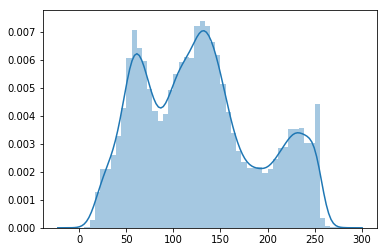

In [6]:
sns.distplot(predictions_r)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


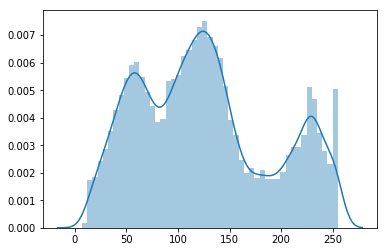

In [7]:
sns.distplot(y_test_r)

In [8]:
# Model for green
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(data_X, data_y_green, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train_g)

X_train_g = scaler.transform(X_train_g)
X_test_g = scaler.transform(X_test_g)

mlp_g = MLPRegressor(hidden_layer_sizes=(10,20,20,20,10),  activation='relu', 
                   solver='adam', max_iter=2000, alpha=0.003, verbose=True)
mlp_g.fit(X_train_g,y_train_g)

Iteration 1, loss = 1686.21133010
Iteration 2, loss = 76.68255680
Iteration 3, loss = 65.08883420
Iteration 4, loss = 60.62775253
Iteration 5, loss = 58.07794827
Iteration 6, loss = 56.14950855
Iteration 7, loss = 54.78715829
Iteration 8, loss = 53.57251854
Iteration 9, loss = 52.65679534
Iteration 10, loss = 51.91403436
Iteration 11, loss = 51.30734408
Iteration 12, loss = 50.66846847
Iteration 13, loss = 50.29819275
Iteration 14, loss = 50.02594947
Iteration 15, loss = 49.62206191
Iteration 16, loss = 49.18409085
Iteration 17, loss = 48.79797349
Iteration 18, loss = 48.68038292
Iteration 19, loss = 48.24024716
Iteration 20, loss = 48.07383750
Iteration 21, loss = 47.85893541
Iteration 22, loss = 47.58746961
Iteration 23, loss = 47.27943891
Iteration 24, loss = 47.16208633
Iteration 25, loss = 46.71843172
Iteration 26, loss = 46.76036118
Iteration 27, loss = 46.58307659
Iteration 28, loss = 46.41510273
Iteration 29, loss = 46.20671048
Iteration 30, loss = 45.98336574
Iteration 31, los

Iteration 246, loss = 35.10433997
Iteration 247, loss = 35.06328775
Iteration 248, loss = 35.02923186
Iteration 249, loss = 35.09805175
Iteration 250, loss = 35.07059573
Iteration 251, loss = 35.00017945
Iteration 252, loss = 35.03374099
Iteration 253, loss = 35.02663763
Iteration 254, loss = 34.96467477
Iteration 255, loss = 34.97173900
Iteration 256, loss = 34.99261877
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 20, 20, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [9]:
predictions_g = mlp_g.predict(X_test_g)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


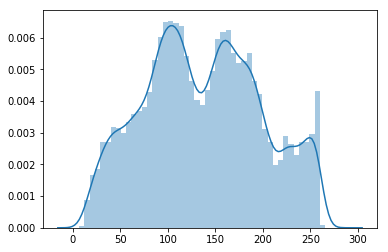

In [10]:
sns.distplot(predictions_g)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


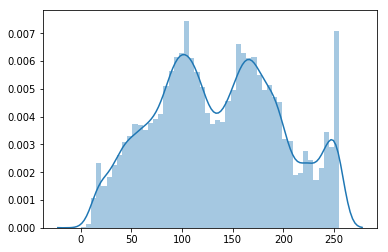

In [11]:
sns.distplot(y_test_g)

In [12]:
# Model for blue
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(data_X, data_y_blue, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train_b)

X_train_b = scaler.transform(X_train_b)
X_test_b = scaler.transform(X_test_b)

mlp_b = MLPRegressor(hidden_layer_sizes=(10,20,20,20,10),  activation='relu', 
                   solver='adam', max_iter=2000, alpha=0.003, verbose=True)
mlp_b.fit(X_train_b,y_train_b)

Iteration 1, loss = 1523.39275523
Iteration 2, loss = 430.51793294
Iteration 3, loss = 316.17413377
Iteration 4, loss = 289.72701221
Iteration 5, loss = 272.36937918
Iteration 6, loss = 259.04897371
Iteration 7, loss = 247.78444196
Iteration 8, loss = 240.25893559
Iteration 9, loss = 233.59701494
Iteration 10, loss = 227.81269954
Iteration 11, loss = 222.72508555
Iteration 12, loss = 217.89112927
Iteration 13, loss = 215.02365797
Iteration 14, loss = 211.23263852
Iteration 15, loss = 209.54170024
Iteration 16, loss = 206.61390715
Iteration 17, loss = 204.60751387
Iteration 18, loss = 202.52304269
Iteration 19, loss = 201.48371066
Iteration 20, loss = 199.34813656
Iteration 21, loss = 197.39914105
Iteration 22, loss = 195.69479486
Iteration 23, loss = 194.84787918
Iteration 24, loss = 193.31004652
Iteration 25, loss = 192.45272917
Iteration 26, loss = 190.68654385
Iteration 27, loss = 190.03860814
Iteration 28, loss = 188.83042033
Iteration 29, loss = 187.85048637
Iteration 30, loss = 1

Iteration 239, loss = 147.71222468
Iteration 240, loss = 148.95536386
Iteration 241, loss = 147.82765985
Iteration 242, loss = 147.17669858
Iteration 243, loss = 147.02421025
Iteration 244, loss = 147.93662448
Iteration 245, loss = 147.65525852
Iteration 246, loss = 147.17016800
Iteration 247, loss = 147.31892240
Iteration 248, loss = 146.86672137
Iteration 249, loss = 147.30352380
Iteration 250, loss = 147.21706065
Iteration 251, loss = 146.96057606
Iteration 252, loss = 146.92883613
Iteration 253, loss = 147.35136128
Iteration 254, loss = 147.41719819
Iteration 255, loss = 146.96964243
Iteration 256, loss = 146.57981099
Iteration 257, loss = 146.62659496
Iteration 258, loss = 146.65830353
Iteration 259, loss = 146.49699707
Iteration 260, loss = 146.92818232
Iteration 261, loss = 146.25120227
Iteration 262, loss = 146.55965459
Iteration 263, loss = 146.20440232
Iteration 264, loss = 145.91202317
Iteration 265, loss = 146.75103907
Iteration 266, loss = 145.66979715
Iteration 267, loss 

MLPRegressor(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 20, 20, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [13]:
predictions_b = mlp_b.predict(X_test_b)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


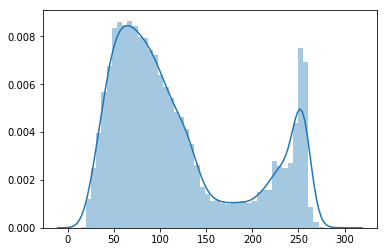

In [14]:
sns.distplot(predictions_b)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


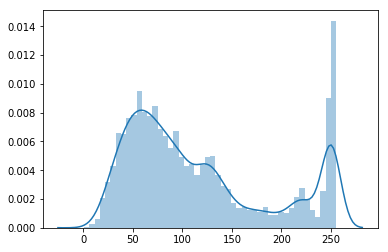

In [15]:
sns.distplot(y_test_b)

In [16]:
def bound_predictions(predictions_b, predictions_g, predictions_r):
    for i in range(len(predictions_g)):
        if predictions_b[i] < 0:
            predictions_b[i] = 0
        if predictions_b[i] > 255:
            predictions_b[i] = 255
        if predictions_g[i] < 0:
            predictions_g[i] = 0
        if predictions_g[i] > 255:
            predictions_g[i] = 255
        if predictions_r[i] < 0:
            predictions_r[i] = 0
        if predictions_r[i] > 255:
            predictions_r[i] = 255
    
        predictions_b[i] = int(predictions_b[i])
        predictions_g[i] = int(predictions_g[i])
        predictions_r[i] = int(predictions_r[i])
        
    return predictions_r, predictions_g, predictions_b

In [45]:
directory = "./Images/test"
filter_size = 11
X, y, files = get_images(directory, filter_size)
print(files)
data_X_test, data_y_red_test, data_y_green_test, data_y_blue_test = align_data(X, y)
data_X_test = scaler.transform(data_X_test)

Opening directory ./Images/test
Accessging  scene9.jpeg
['scene9.jpeg']


In [46]:
test_predictions_b = mlp_b.predict(data_X_test)
test_predictions_g = mlp_g.predict(data_X_test)
test_predictions_r = mlp_r.predict(data_X_test)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


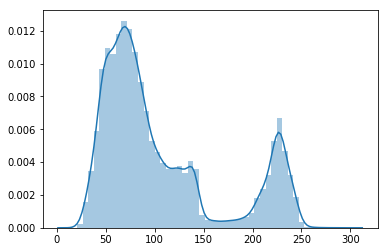

In [47]:
sns.distplot(test_predictions_b)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


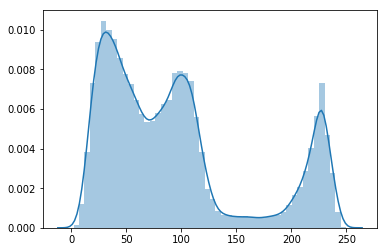

In [48]:
sns.distplot(data_y_blue_test)

In [49]:
test_predictions_b, test_predictions_g, test_predictions_r = bound_predictions(test_predictions_b, test_predictions_g, test_predictions_r)

In [50]:
test_predictions_b

array([ 50.,  68.,  66., ..., 100., 107.,  88.])

In [51]:
from PIL import Image

In [52]:
class Colorizer():
    def __init__(self, red_list, blue_list, green_list, image_location='./Images/test/scene9.jpeg'):
        self.im_size = (0, 0)
        self.image_loc = image_location
        self.image = None
        self.pix_object = None
        self.pixel_values = None
        self.red = red_list
        self.blue = blue_list
        self.green = green_list
        
    def extract_pixels(self):
        # Open the image
        self.image = Image.open(self.image_loc)
        # Load the image - Pixel object
        self.pix_object = self.image.load()
        # Size of the image - Number of rows * Number of columns
        self.im_size = self.image.size
        # Extract all the pixel values - Start from left corner (Moving from Left to Right)
        self.pixel_values = list(self.image.getdata())
        
    def create_image_from_array(self):
        
        w, h = 500, 500
        count = 0
        data = np.zeros((h, w, 3), dtype=np.uint8)
        
        for i in range(w):
            
            for j in range(h):
                
                data[i,j] = (int(self.red[count]), int(self.green[count]), int(self.blue[count]))
                count +=1
        
        img = Image.fromarray(data, 'RGB')
        img.save('my.png')
        img.show()

In [53]:
new_color = Colorizer(red_list=test_predictions_r, blue_list=test_predictions_b, green_list=test_predictions_g)
new_color.extract_pixels()
new_color.create_image_from_array()
print("Done")

Done
